# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [3]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df1 = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [4]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df1['Dia'] = pd.to_datetime(df1['Dia'])
# df1.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [5]:
df1

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

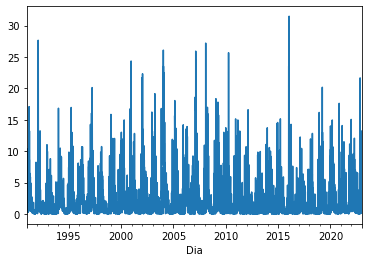

In [6]:
df1['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Mudança (positivva ou negativa) percentual (%) de um ano para o ano seguinte

Qual é a porcentagem de mudança de um ano A para um ano B? A função **pct_change** faz este cálculo.

Exemplo:
- Chuva total em 1991: 648.670776
- Chuva total em 1992: 741.301758
- A mudança de 1991 para 1992 foi de: (741.301758 / 648.670776) x 100 = 114,2801226 - 100 = +14,280717%.

In [7]:
# Acumulado mensal.
chuva_acumulada = df1.resample('MS').sum()

# Formata a data de forma a remover o dia.
chuva_acumulada.index = chuva_acumulada.index.strftime('%Y-%m')

# Renomeia o index de 'Dia' para 'Mes'.
chuva_acumulada.index.name = 'Mes'

chuva_acumulada

,Chuva
Mes,
1991-01,100.099646
1991-02,79.893940
1991-03,164.202329
1991-04,71.712449
1991-05,56.974305
...,...
2022-08,35.391962
2022-09,14.892078
2022-10,16.885503


In [8]:
# Uso do reshape para organizar o dado no formato vetor para o formato tabular (linhas x colunas).
# 32 = anos.
# 12 = meses.

dado_reshape = chuva_acumulada['Chuva'].values.reshape(32,12)

# Nome dos rótulos das colunas.
colunas = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Nome dos rótulos do index.
index = range(1991, 2023)

# Cria o DataFrame.
df2 = pd.DataFrame(
    data=dado_reshape, 
    index=index, 
    columns=colunas
)

df2

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1991,100.099646,79.893940,164.202329,71.712449,56.974305,26.477652,12.856383,14.162914,4.031318,5.157082,72.598380,40.504320
1992,219.365838,146.837050,89.832540,73.233083,11.459463,24.571975,21.251295,6.829009,13.757358,16.847679,45.421162,71.895308
1993,49.076026,54.951604,55.997140,48.910159,27.047003,14.300651,15.272164,7.003137,7.962822,21.911219,28.046429,36.357286
1994,113.659772,100.130545,176.620997,109.186761,62.264040,71.403966,30.487092,6.763389,8.827073,8.378450,28.984001,57.135119
1995,67.111676,110.128860,131.431263,148.319529,103.969422,29.755495,28.987825,6.343277,3.320883,15.852721,77.894939,80.272415
1996,75.620965,85.704758,147.965641,161.022716,53.885691,28.335045,16.862794,17.105372,7.448889,20.105777,93.265490,35.514211
1997,125.218679,65.670997,250.012930,116.590857,59.936182,15.083758,18.377229,11.314254,3.000110,32.169334,33.424680,54.426581
1998,110.865513,57.572249,74.942890,32.091287,17.635043,16.528275,16.960138,11.296472,2.924803,6.543128,74.763913,57.237045
1999,80.350378,85.277602,150.435405,55.227839,84.036904,17.328327,19.017814,17.067169,21.352269,39.673623,86.691563,120.673901
2000,109.138180,143.464437,110.721965,136.306123,39.746944,38.314618,33.246495,26.505228,25.393209,8.040904,89.847907,121.982460


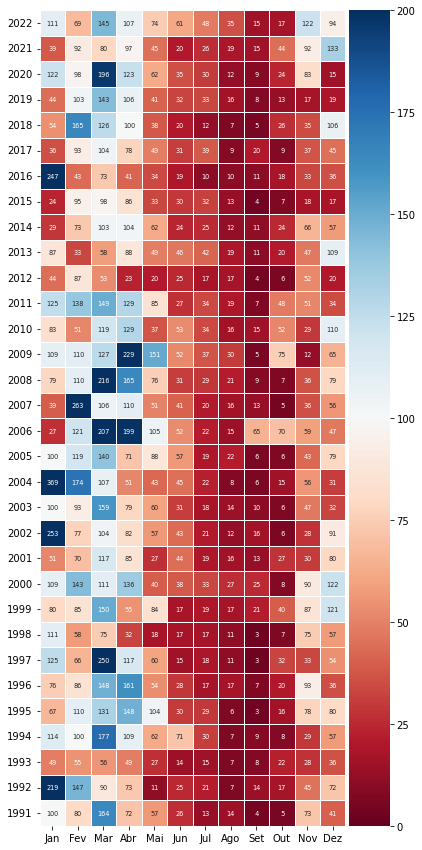

In [12]:
# Plot do heatmap.

fig, ax = plt.subplots(figsize=(20, 15))
    
ax = sns.heatmap(df2, 
                 cmap='RdBu', 
                 linewidths=0.5, 
                 fmt='2.0f',
                 annot_kws={'size': 6.5},
                 cbar_kws={'orientation': 'vertical', 'shrink': 1, 'pad':0.003},  
                 annot=True, 
                 square=True,
                 vmin=0,
                 vmax=200
)

# Inverte o eixo y.
ax.invert_yaxis()